In [7]:
import pandas as pd
from lvtlaw.g_result import print_PL
from lvtlaw.h_loadoutput import calibrated_result_
from data.datamapping import *
f = pd.read_csv(f'./data/input/{file_name}.csv')
result, r_reg, res, pre = calibrated_result_()

col='JK'
f[dis_list[0]] = result[f'muS0{col}{dis_flag[0]}']
f['EBV'] = result[f'rdS0{col}{dis_flag[0]}']
#f.to_csv(f'./data/input/{file_name}_{col}.csv')
#f
#result.style#[[f'rdS0{col}_j' for col in ['VJ']]]#.style
slp, intr = print_PL(r_reg, col, file_name)

* * a_utils module loaded!
* * g_result module loaded!
* * datamapping module loaded!
PL for 58_madore_VJ calibrated with JK
B(0.049) = -2.268(0.022) (logP - 1) -3.213(0.007)
V(0.035) = -2.660(0.015) (logP - 1) -3.942(0.005)
R(0.088) = -2.864(0.039) (logP - 1) -4.391(0.012)
I(0.147) = -2.972(0.066) (logP - 1) -4.701(0.020)
J(0.229) = -3.185(0.102) (logP - 1) -5.249(0.031)
H(0.241) = -3.317(0.108) (logP - 1) -5.545(0.032)
K(0.248) = -3.361(0.111) (logP - 1) -5.645(0.033)


./docs/reports/plots/9_compare/mudev.pdf


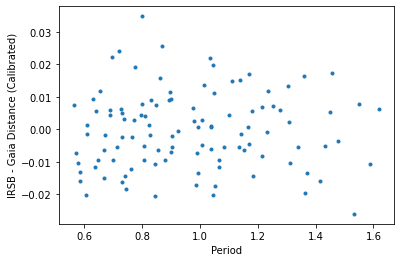

In [2]:
# Gaia - IRSB deviation
import pandas as pd
import matplotlib.pyplot as plt 
from data.datamapping import *
from lvtlaw.a_utils import imgsave
file_name = '109_IRSB'
gaia = pd.read_csv(f'./data/input/{file_name}_plx_IH_VH.csv')
IRSB = pd.read_csv(f'./data/input/{file_name}_IH_VJ.csv')

plt.plot(gaia.logP, IRSB.EBV-gaia.EBV,'.')
plt.xlabel(f'Period')
plt.ylabel(f'IRSB - Gaia Distance (Calibrated)')
imgsave('mudev',step=8,img_path=img_out_path)


# Test: LMC-SMC Distance 

In [5]:
import pandas as pd 
from data.datamapping import mag
LMC = pd.read_csv('data/processed/29_LMC_3.4/8_result/29_merged_data.csv')
SMC = pd.read_csv('data/processed/32_SMC_VIJK_2.53/8_result/32_merged_data.csv')
SMC.head()

* * datamapping module loaded!


,Unnamed: 0,name,logP,EBV,IRSB,M_V_s,M_I_s,M_J_s,M_K_s,M_V0_s,...,p_J0VKS_s,p_J0IJS_s,p_J0IKS_s,p_J0JKS_s,p_K0VIS_s,p_K0VJS_s,p_K0VKS_s,p_K0IJS_s,p_K0IKS_s,p_K0JKS_s
0,0,HV1328,1.199692,0.016,18.395,14.122,13.401,12.962,12.567,14.08152,...,13.196631,13.196837,13.193118,13.191066,12.717409,12.716930,12.716234,12.716640,12.712605,12.709728
1,1,HV1333,1.212084,0.024,19.255,14.682,13.841,13.253,12.771,14.62128,...,13.159271,13.159473,13.156921,13.153495,12.677001,12.676477,12.675843,12.676246,12.673432,12.669087
2,2,HV1335,1.157800,0.024,18.624,14.761,13.963,13.428,12.961,14.70028,...,13.322930,13.323151,13.315485,13.318075,12.854012,12.853686,12.852781,12.853196,12.845035,12.847115
3,3,HV1345,1.129670,0.031,18.731,14.747,13.992,13.437,12.947,14.66857,...,13.407739,13.407969,13.397653,13.403360,12.945740,12.945515,12.944470,12.944892,12.933960,12.939369
4,4,HV822,1.223807,0.039,19.078,14.517,13.654,13.107,12.596,14.41833,...,13.123927,13.124125,13.122678,13.117953,12.638774,12.638208,12.637632,12.638032,12.636373,12.630641


In [6]:
M_L, M_S = pd.DataFrame(),pd.DataFrame()
for a in mag:
    M_L[a] = slp[a]*(LMC['logP']-1) + intr[a]
    M_S[a] = slp[a]*(SMC['logP']-1) + intr[a]

NameError: name 'slp' is not defined

In [4]:
disL = pd.DataFrame()
disS = pd.DataFrame()
for m in ['V', 'I', 'J', 'K']:
    disL[m] = LMC[f'M_{m}0_l'] - M_L[m]
    disS[m] = SMC[f'M_{m}0_s'] - M_S[m]
print(disL.mean())
print(disS.mean())

KeyError: 'V'